# Multiple Linear Regression
Copied and adapted from OpenStats Intro ["Multiple linear regression" lab](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/multiple_regression/multiple_regression.html), a product of OpenIntro that is released under a [Creative Commons Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0). Original lab was written by Mine Çetinkaya-Rundel and Andrew Bray.

The [data set](https://www.openintro.org/stat/data/?data=evals) contains end of semester student evaluations for a large sample of professors from the University of Texas at Austin, along with ratings on professor appearance.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

## Grading the professor
Many college courses conclude by giving students the opportunity to evaluate the course and the instructor anonymously. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. The article titled, “Beauty in the classroom: instructors’ pulchritude and putative pedagogical productivity” (Hamermesh and Parker, 2005) found that instructors who are viewed to be better looking receive higher instructional ratings. (Daniel S. Hamermesh, Amy Parker, [Beauty in the classroom: instructors pulchritude and putative pedagogical productivity](http://www.sciencedirect.com/science/article/pii/S0272775704001165), Economics of Education Review, Volume 24, Issue 4, August 2005, Pages 369-376, ISSN 0272-7757, 10.1016/j.econedurev.2004.07.013.

In this lab we will analyze the data from this study in order to learn what goes into a positive professor evaluation.

## The data
The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors’ physical appearance. (This is aslightly modified version of the original data set that was released as part of the replication data for Data Analysis Using Regression and Multilevel/Hierarchical Models (Gelman and Hill, 2007).) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors.

| variable  | description |
| ----------|-------------|
|`score` | average professor evaluation score: (1) very unsatisfactory - (5) excellent.|
| `rank` |   rank of professor: teaching, tenure track, tenured.|
| `ethnicity`  | ethnicity of professor: not minority, minority.|
| `gender` | gender of professor: female, male.|
| `language`   | language of school where professor received education: english or non-english.|
| `age` |age of professor.|
| `cls_perc_eval`   |percent of students in class who completed evaluation.|
| `cls_did_eval`    |number of students in class who completed evaluation.|
| `cls_students`    |total number of students in class.|
| `cls_level`   |class level: lower, upper.|
| `cls_profs`   |number of professors teaching sections in course in sample: single, multiple.|
| `cls_credits` |number of credits of class: one credit (lab, PE, etc.), multi credit.|
| `bty_f1lower` |beauty rating of professor from lower level female: (1) lowest - (10) highest.|
| `bty_f1upper` |beauty rating of professor from upper level female: (1) lowest - (10) highest.|
| `bty_f2upper` |beauty rating of professor from second upper level female: (1) lowest - (10) highest.|
| `bty_m1lower` |beauty rating of professor from lower level male: (1) lowest - (10) highest.|
| `bty_m1upper` |beauty rating of professor from upper level male: (1) lowest - (10) highest.|
| `bty_m2upper` |beauty rating of professor from second upper level male: (1) lowest - (10) highest.|
| `bty_avg` |average beauty rating of professor.|
| `pic_outfit`  |outfit of professor in picture: not formal, formal.|
| `pic_color`   |color of professor’s picture: color, black & white.|

In [92]:
evals = pd.read_csv("https://www.openintro.org/stat/data/evals.csv")

## Exploring the data

### Exercise 1
Is this an observational study or an experiment? The original research question posed in the paper is whether beauty leads directly to the differences in course evaluations. Given the study design, is it possible to answer this question as it is phrased? If not, rephrase the question. 

Is there a correlation between beauty and course evaluation scores? 

### Exercise 2
Describe the distribution of `score`. Is the distribution skewed? What does that tell you about how students rate courses? Is this what you expected to see? Why, or why not?


### Exercise 3
Excluding `score`, select two other variables and describe their relationship using an appropriate visualization (scatterplot, side-by-side boxplots, or mosaic plot).


In [37]:
evals.describe()

,score,age,cls_perc_eval,cls_did_eval,cls_students,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,4.174730,48.365011,74.427788,36.624190,55.177106,3.963283,5.019438,5.213823,3.412527,4.146868,4.751620,4.417844
std,0.543865,9.802742,16.756311,45.018481,75.072800,1.873936,1.934437,2.018224,1.637102,2.110586,1.575266,1.527380
min,2.300000,29.000000,10.416670,5.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.667000
25%,3.800000,42.000000,62.696165,15.000000,19.000000,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.167000
50%,4.300000,48.000000,76.923080,23.000000,29.000000,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.333000
75%,4.600000,57.000000,87.249170,40.000000,60.000000,5.000000,7.000000,6.000000,5.000000,5.000000,6.000000,5.500000
max,5.000000,73.000000,100.000000,380.000000,581.000000,8.000000,9.000000,10.000000,7.000000,9.000000,9.000000,8.167000


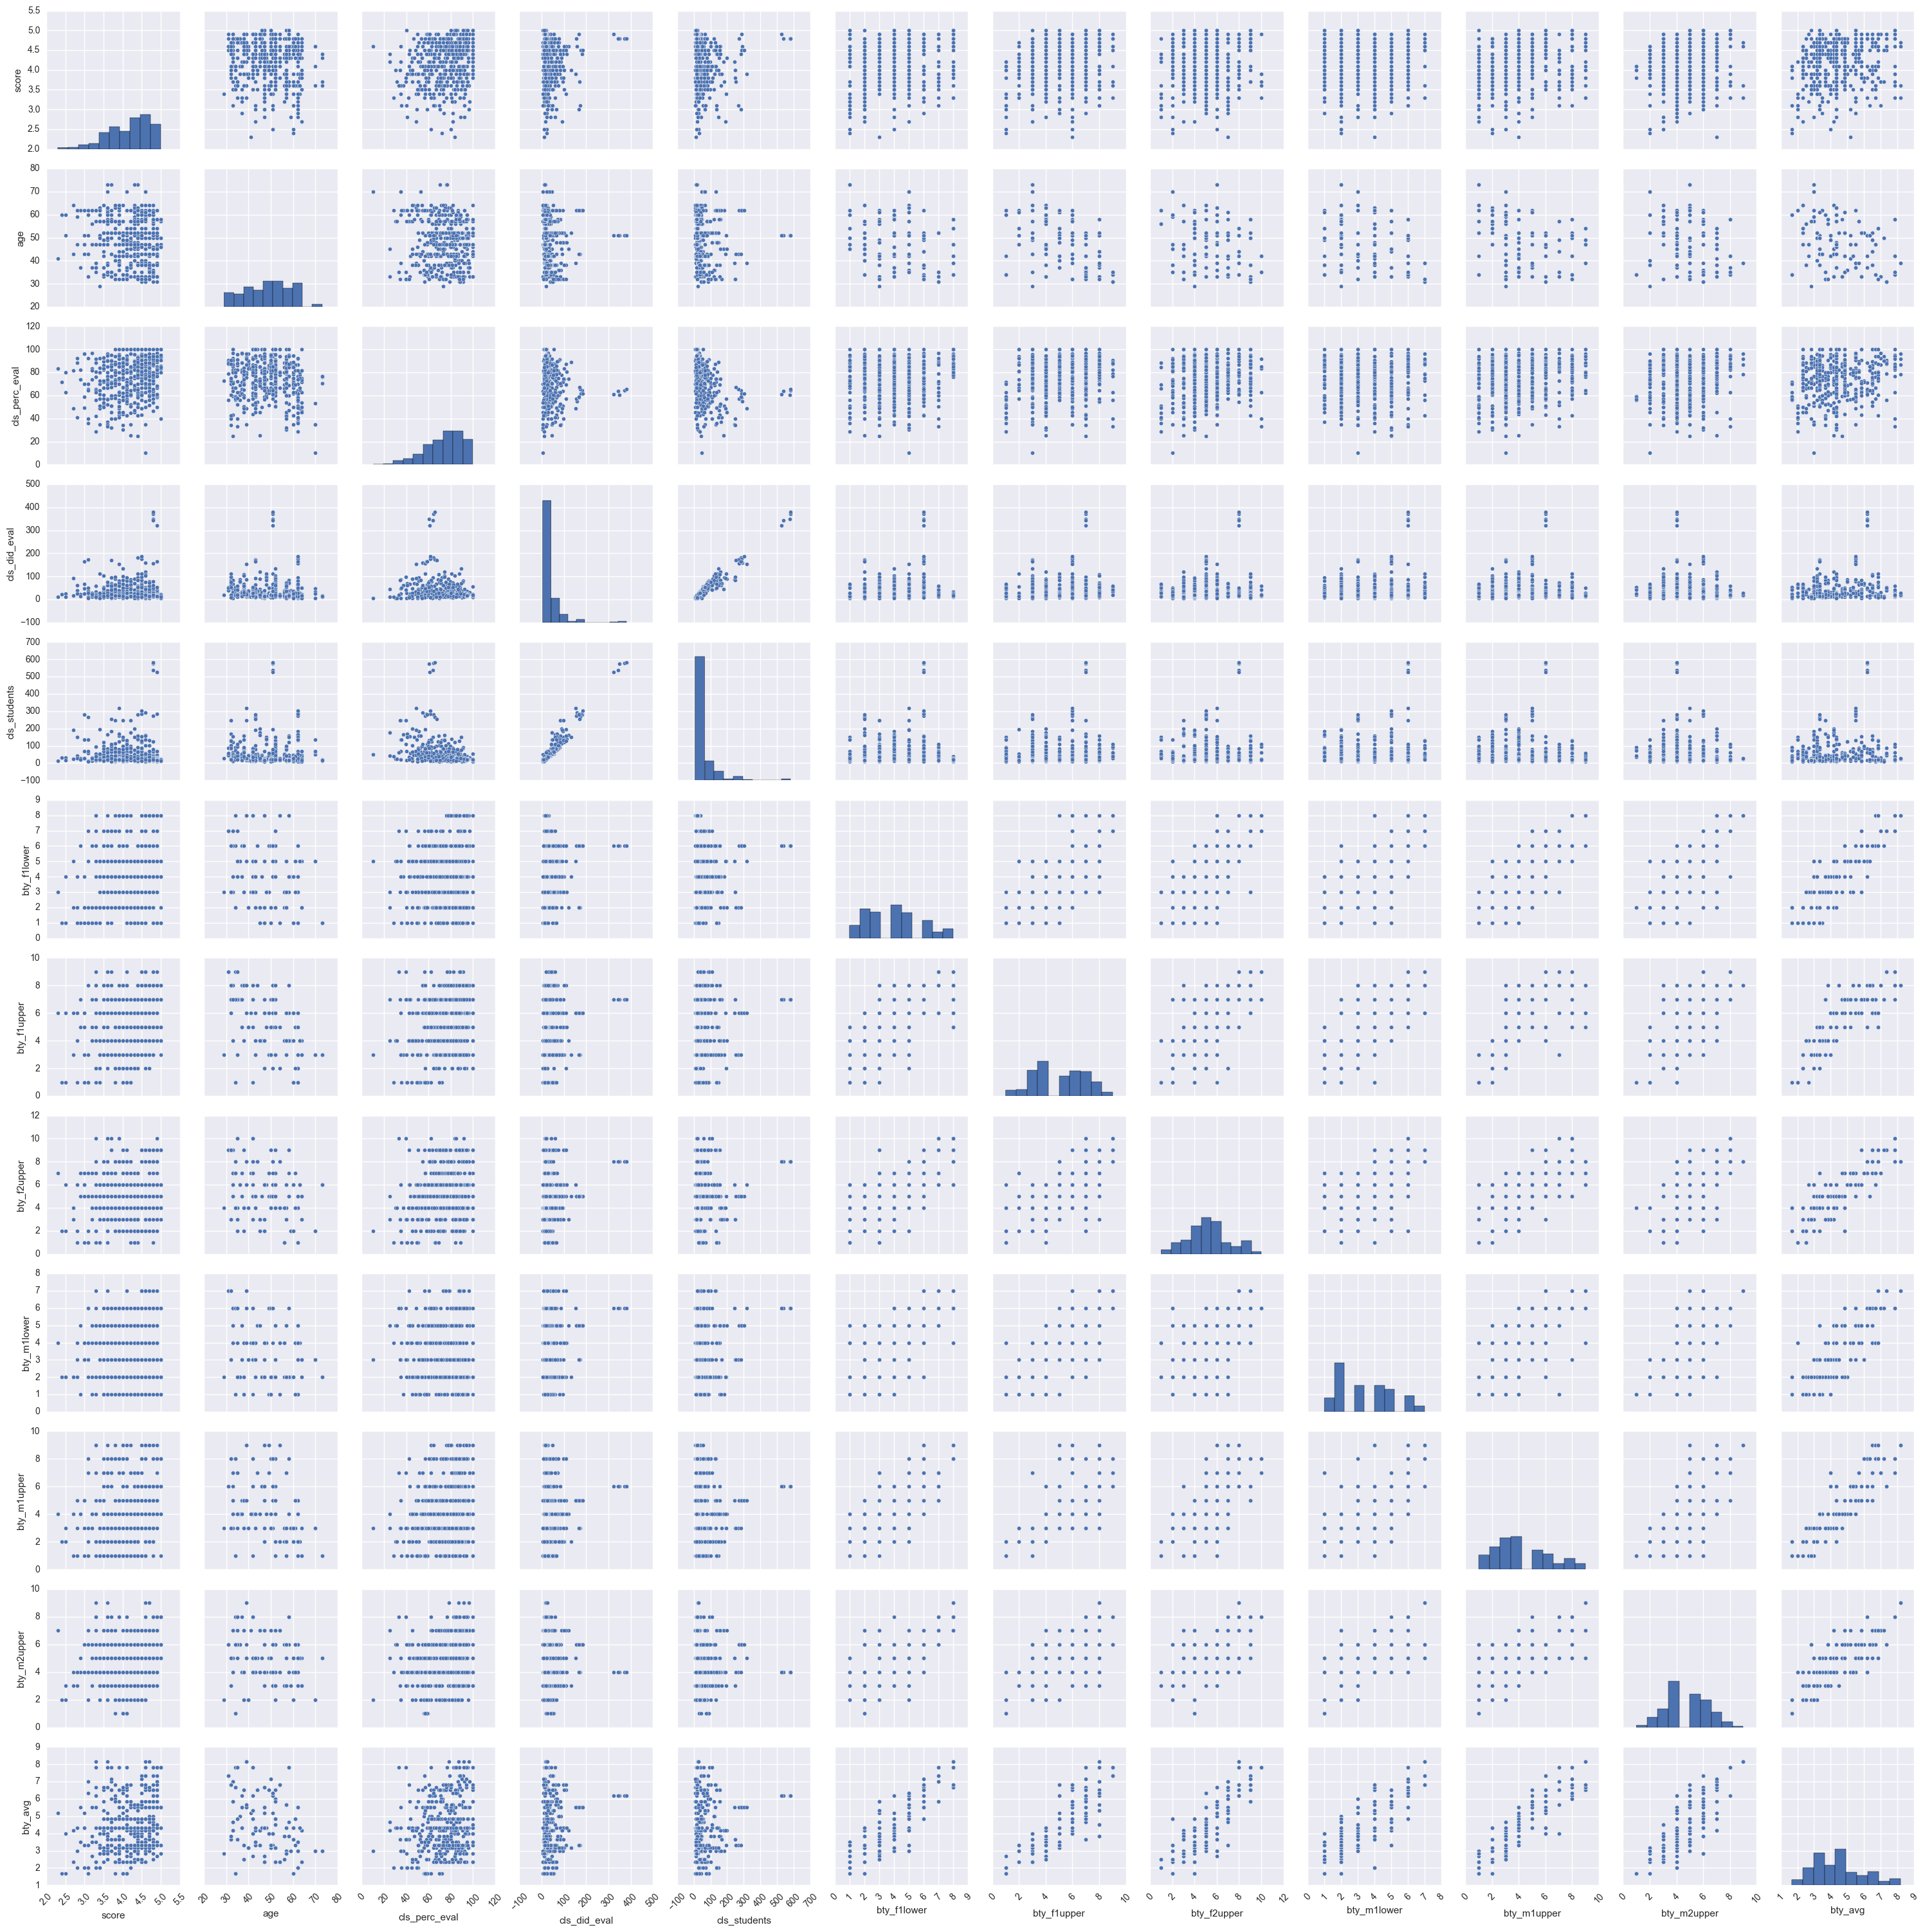

In [36]:
#evals.describe()
#evals["score"].hist()
#evals.score.hist(color = "green")

#fig = plt.figure()
#a = fig.add_subplot(111)
#a.scatter(evals.age,evals.bty_avg)

g = sns.pairplot(evals, diag_kind = "hist")

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation = 45)



## Simple linear regression
The fundamental phenomenon suggested by the study is that better looking teachers are evaluated more favorably. Let’s create a scatterplot to see if this appears to be the case:

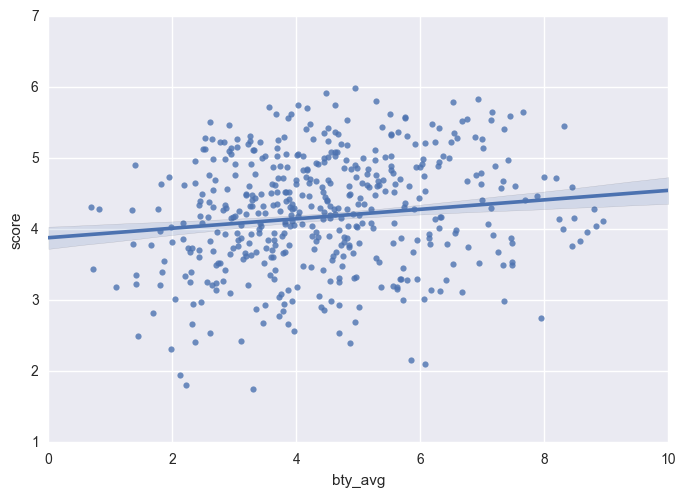

In [40]:
sns.regplot("bty_avg", "score", evals, fit_reg=True, x_jitter = True, y_jitter = True)

Before we draw conclusions about the trend, compare the number of observations in the data frame with the approximate number of points on the scatterplot. Is anything awry?

In [42]:
#Exercise 5
m_bty = sm.OLS(evals.score, sm.add_constant(evals.bty_avg))
results = m_bty.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           5.08e-05
Time:                        19:40:44   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0

### Exercise 4
Replot the scatterplot, but this time pass the argument `x_jitter=True` or `y_jitter=True` to add noise to either the $x$ or $y$ variable in the data points. What was misleading about the initial scatterplot?

### Exercise 5
Let’s see if the apparent trend in the plot is something more than natural variation. Fit a linear model called `m_bty` to predict average professor score by average beauty rating and add the line to your plot. Write out the equation for the linear model and interpret the slope. Is average beauty score a statistically significant predictor? Does it appear to be a practically significant predictor?

### Exercise 6
Use residual plots to evaluate whether the conditions of least squares regression are reasonable. Provide plots and comments for each one (see the Linear Regression Lab for a reminder of how to make these).

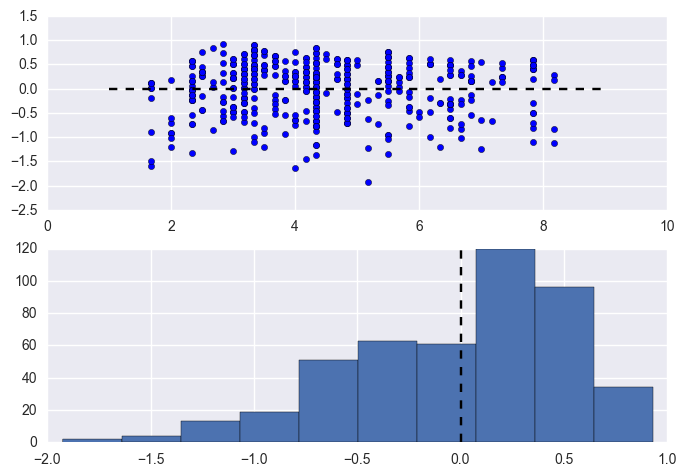

In [64]:
fig = plt.figure()
a = fig.add_subplot(2,1,1)
a.scatter(evals.bty_avg,results.resid)
# add a horizontal dashed line at y=0
a.hlines(0, *a.get_xlim(), linestyles="--")

b = fig.add_subplot(2,1,2)
b.hist(results.resid)
b.vlines(0, *b.get_ylim(), linestyles = "--")

## Multiple linear regression

The data set contains several variables on the beauty score of the professor: individual ratings from each of the six students who were asked to score the physical appearance of the professors and the average of these six scores. Let’s take a look at the relationship between one of these scores and the average beauty score.

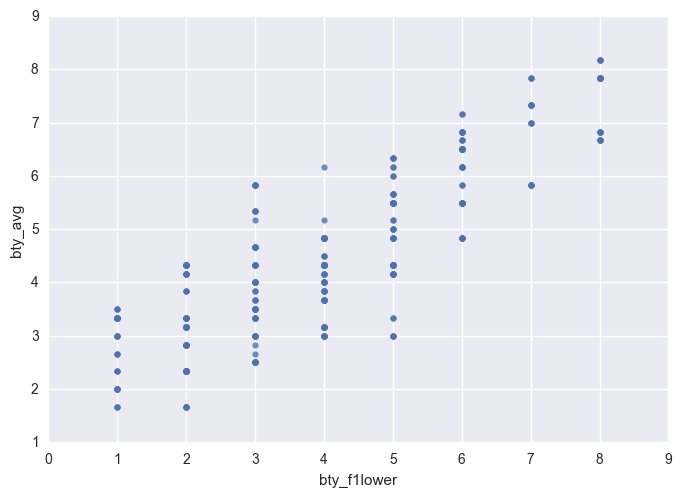

In [65]:
sns.regplot("bty_f1lower", "bty_avg", evals, fit_reg=False)

In [66]:
evals.bty_f1lower.corr(evals.bty_avg)

0.84391116921478848

As expected the relationship is quite strong - after all, the average score is calculated using the individual scores. We can actually take a look at the relationships between all beauty variables (columns 13 through 19) using the following command:

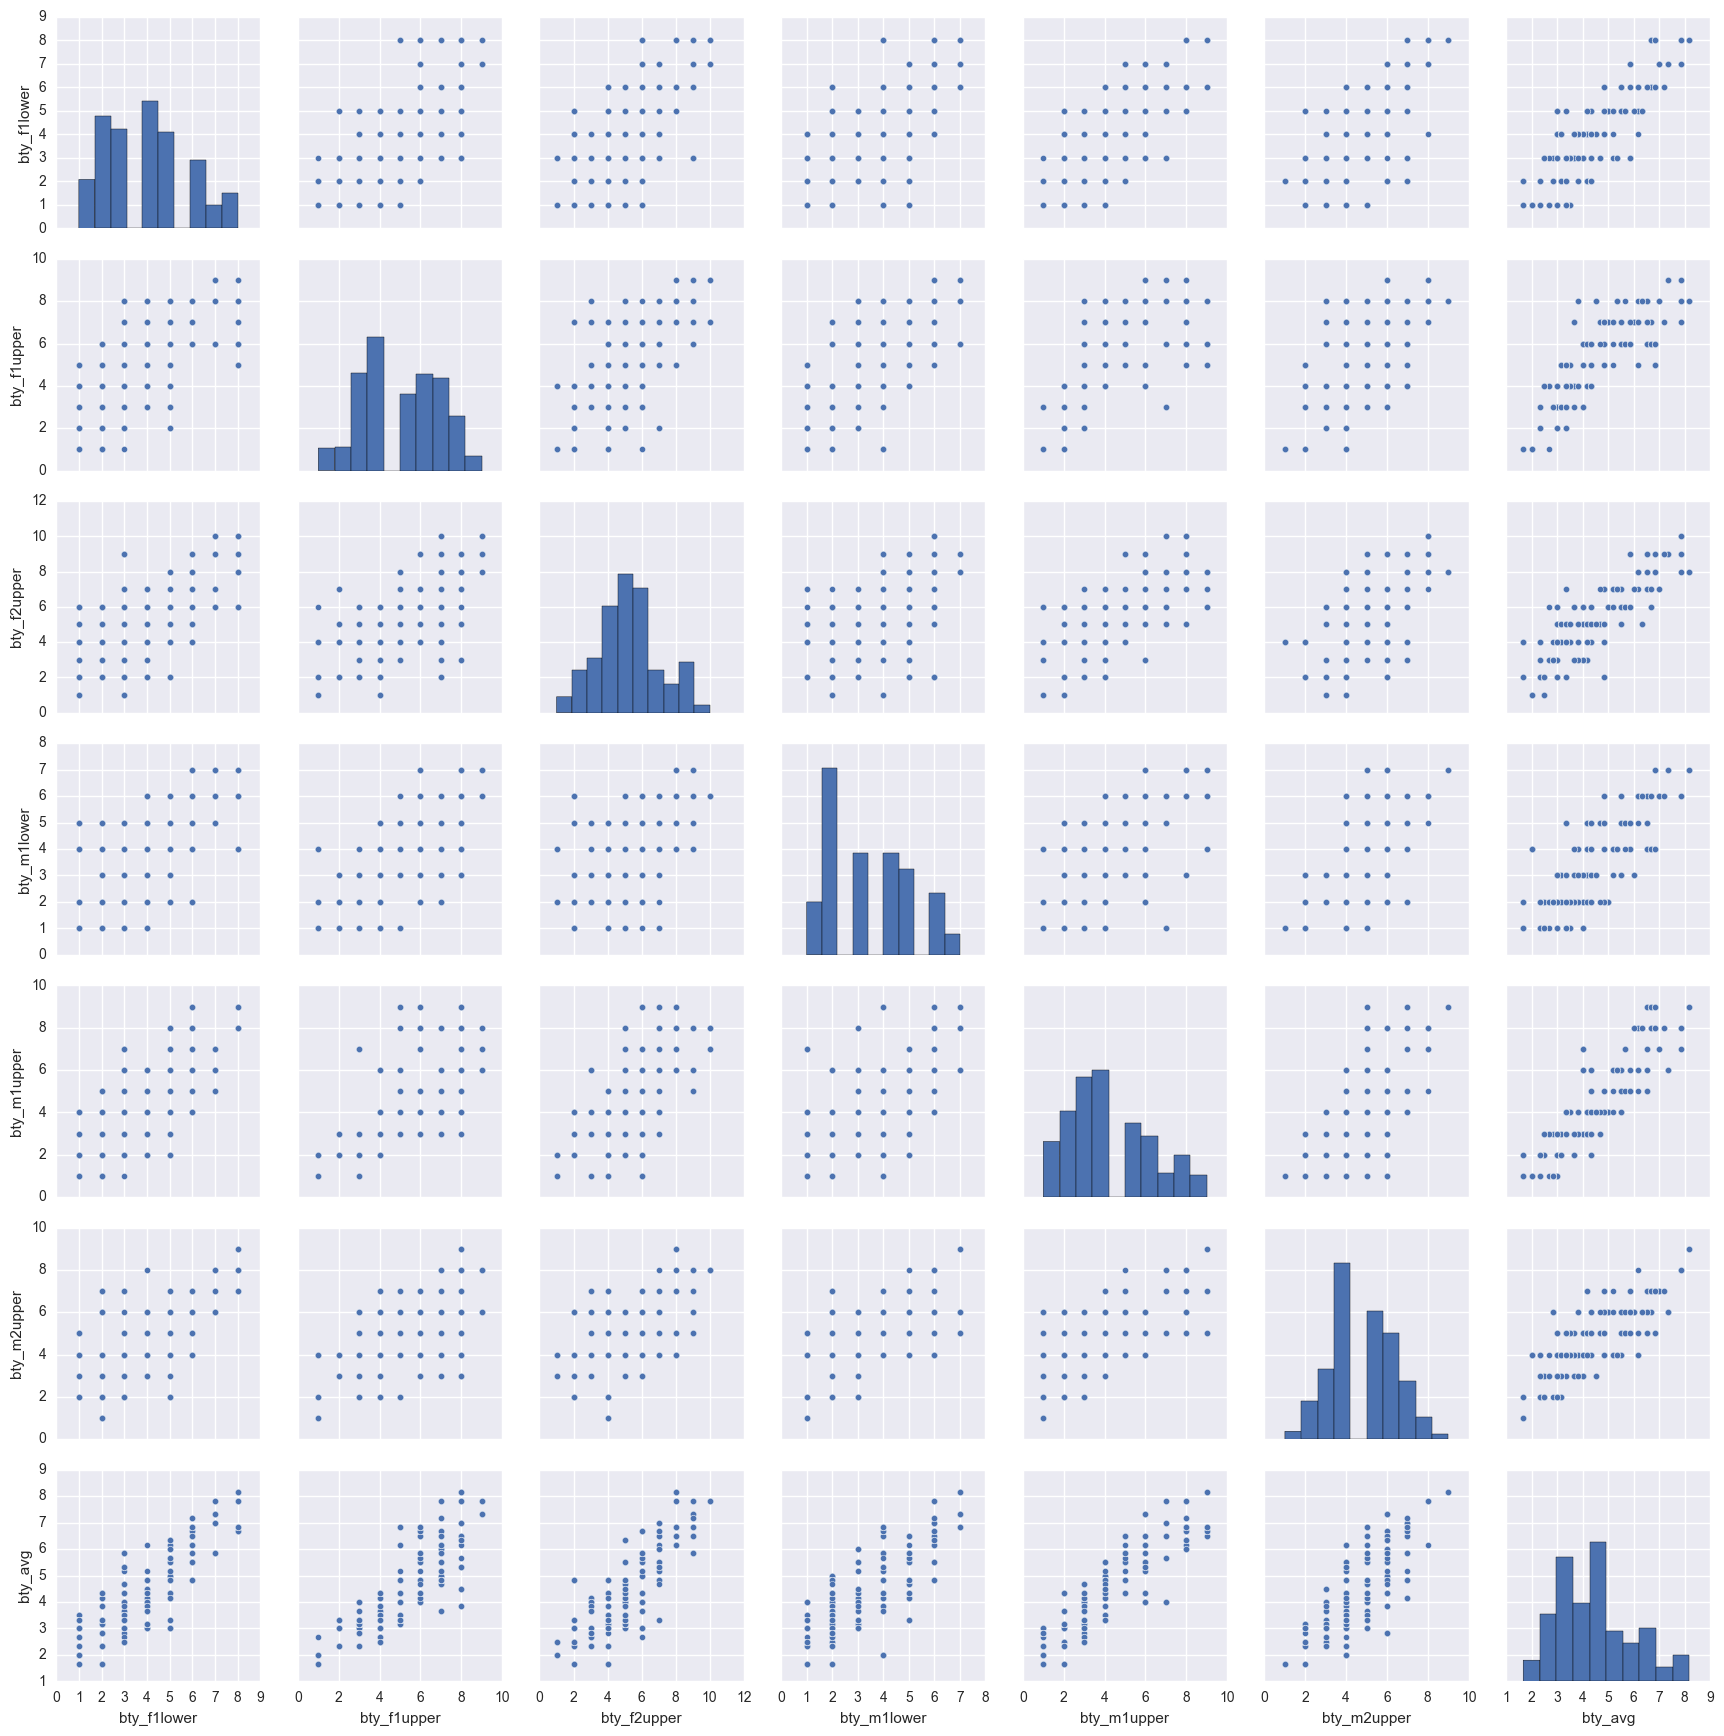

In [67]:
sns.pairplot(evals[evals.columns[12:19]])

These variables are collinear (correlated), and adding more than one of these variables to the model would not add much value to the model. In this application and with these highly-correlated predictors, it is reasonable to use the average beauty score as the single representative of these variables.

In order to see if beauty is still a significant predictor of professor score after we’ve accounted for the gender of the professor, we can add the gender term into the model.

In [93]:
# convert the categorical variable gender to dummy integers; 
#     columns added to original dataframe
evals1 = evals.join(pd.get_dummies(evals['gender'], prefix='gender'))

In [74]:
X = evals1[["bty_avg", "gender_male"]]
X = sm.add_constant(X)
X = sm.add_constant(X)
Y = evals1["score"]
m_bty_gen = sm.OLS(Y, X)
results = m_bty_gen.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           8.18e-07
Time:                        20:04:57   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           3.7473      0.085     44.266      0.000         3.581     3.914
bty_avg         0.0742      0.016      4.563      0.000         0.042     0.106
gender_male     0.1724      0.050      3.433      0.001         0.074     0.271
==============================================================================
Omnibus:                       30.145   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.960
Skew:                          -0.672   Prob(JB):                     2.56e-08
Kurtosis:                       2.925   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 7
P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Verify that the conditions for this model are reasonable using diagnostic plots.

### Exercise 8
Is `bty_avg` still a significant predictor of `score`? Has the addition of `gender` to the model changed the parameter estimate for `bty_avg`?

Note that the estimate for `gender` is now called `gender_male`. To use the categorical variable in the model, we had to encode it with integers. We acheived this by using pandas.get_dummies() function, which created a  column for each unique value in the column named `prefix_value` (note that the name "prefix" and the separater, default "\_", can be passed as key word arguments). In the column `gender_male`, the value is `1` if the gender is `male`, `0` if the gender is female. 

As a result, for females, the parameter estimate is multiplied by zero, leaving the intercept and slope form familiar from simple regression.

$$
\begin{aligned}
\widehat{score} & =\hat{\beta}_0 + \hat{\beta}_1 \times bty\_avg + \hat{\beta}_2 \times (0) \\
 & = \hat{\beta}_0 + \hat{\beta}_1 \times bty\_avg \\
 \end{aligned}
$$

We can plot this line and the line corresponding to males.

Help on method map in module seaborn.axisgrid:

map(func, *args, **kwargs) method of seaborn.axisgrid.FacetGrid instance
    Apply a plotting function to each facet's subset of the data.
    
    Parameters
    ----------
    func : callable
        A plotting function that takes data and keyword arguments. It
        must plot to the currently active matplotlib Axes and take a
        `color` keyword argument. If faceting on the `hue` dimension,
        it must also take a `label` keyword argument.
    args : strings
        Column names in self.data that identify variables with data to
        plot. The data for each variable is passed to `func` in the
        order the variables are specified in the call.
    kwargs : keyword arguments
        All keyword arguments are passed to the plotting function.
    
    Returns
    -------
    self : object
        Returns self.



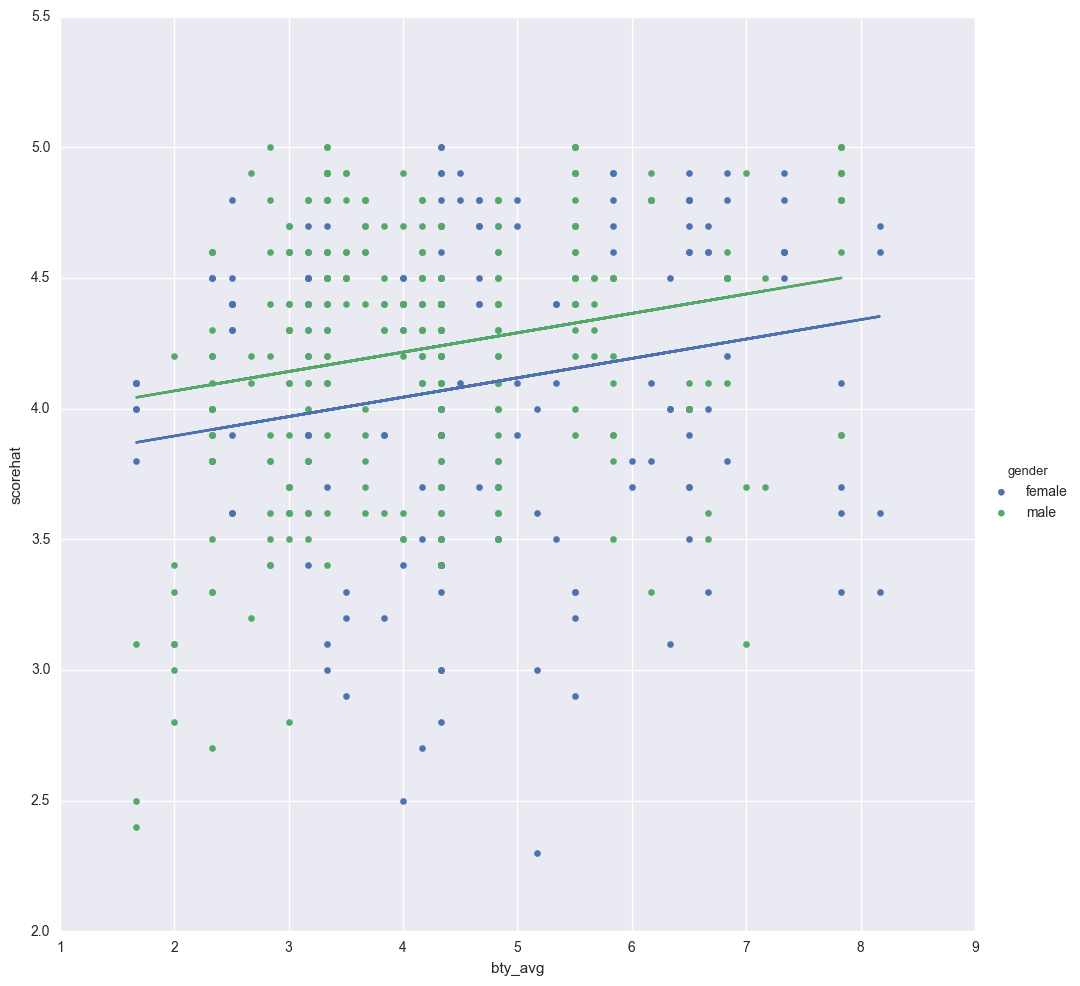

In [75]:
evals1["scorehat"] = results.fittedvalues
g = sns.FacetGrid(evals1, hue="gender", size=10)
g = g.map(plt.scatter, "bty_avg", "score")
g = g.map(plt.plot, "bty_avg", "scorehat")
g.add_legend()
help(g.map)

### Exercise 9
What is the equation of the line corresponding to males? (*Hint*: For males, the parameter estimate is multiplied by 1.) For two professors who received the same beauty rating, which gender tends to have the higher course evaluation score?

### Exercise 10
Create a new model called `m_bty_rank` with `gender` removed and `rank` added in. Note that the rank variable has three levels:  `teaching`, `tenure track`, `tenured`.

In [94]:
evals2 = evals.join(pd.get_dummies(evals['rank'], prefix='rank'))
print(evals.head())

   score          rank     ethnicity  gender language  age  cls_perc_eval  \
0    4.7  tenure track      minority  female  english   36       55.81395   
1    4.1  tenure track      minority  female  english   36       68.80000   
2    3.9  tenure track      minority  female  english   36       60.80000   
3    4.8  tenure track      minority  female  english   36       62.60163   
4    4.6       tenured  not minority    male  english   59       85.00000   

   cls_did_eval  cls_students cls_level    ...      cls_credits bty_f1lower  \
0            24            43     upper    ...     multi credit           5   
1            86           125     upper    ...     multi credit           5   
2            76           125     upper    ...     multi credit           5   
3            77           123     upper    ...     multi credit           5   
4            17            20     upper    ...     multi credit           4   

   bty_f1upper  bty_f2upper  bty_m1lower  bty_m1upper  bty_m2u

In [95]:

X = evals2[["bty_avg", "rank_tenured", "rank_teaching"]]
X = sm.add_constant(X)
X = sm.add_constant(X)
X = sm.add_constant(X)
Y = evals2["score"]
m_bty_rank = sm.OLS(Y, X)
results = m_bty_rank.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     7.465
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           6.88e-05
Time:                        20:34:38   Log-Likelihood:                -363.45
No. Observations:                 463   AIC:                             734.9
Df Residuals:                     459   BIC:                             751.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             3.8208      0.096     39.702      0.000         3.632     4.010
bty_avg           0.0678      0.017      4.098      0.000         0.035     0.100
rank_tenured      0.0345      0.062      0.552      0.581        -0.088     0.157
rank_teaching     0.1607      0.074      2.173      0.030         0.015     0.306
==============================================================================
Omnibus:                       31.962   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.454
Skew:                          -0.696   Prob(JB):                     7.36e-09
Kurtosis:                       2.925   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interpretation of the coefficients in multiple regression is slightly different from that of simple regression. The estimate for `bty_avg` reflects how much higher a group of professors is expected to score if they have a beauty rating that is one point higher *while holding all other variables constant*. In this case, that translates into considering only professors of the same rank with `bty_avg` scores that are one point apart.

## The search for the best model

We will start with a full model that predicts professor score based on rank, ethnicity, gender, language of the university where they got their degree, age, proportion of students that filled out evaluations, class size, course level, number of professors, number of credits, average beauty rating, outfit, and picture color.

### Exercise 11
Which variable would you expect to have the highest p-value in this model? Why? *Hint*: Think about which variable would you expect to not have any association with the professor score.

To run this much larger model we will let statsmodels do the conversion of categorical variables to integer values by using the statsmodels.formula module. This module parses R-style formulas and treats string variables as categorical variables, converting them to integers. In R formulas, the response variable is separated from the explanatory variables by a tilde. For instance, the first model would be written "score ~ bty_avg + gender", the second as "score ~ bty_avg + rank".

In [96]:
m_full = sm.formula.ols(formula="score ~ rank + ethnicity + gender + language"
                     "+ age + cls_perc_eval + cls_students + cls_level + cls_profs"
                     "+ cls_credits + bty_avg + pic_outfit + pic_color", data=evals)
m_full.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.366
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           6.55e-14
Time:                        20:35:57   Log-Likelihood:                -326.52
No. Observations:                 463   AIC:                             683.0
Df Residuals:                     448   BIC:                             745.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     4.0952      0.291     14.096      0.000         3.524     4.666
rank[T.tenure track]         -0.1476      0.082     -1.798      0.073        -0.309     0.014
rank[T.tenured]              -0.0973      0.066     -1.467      0.143        -0.228     0.033
ethnicity[T.not minority]     0.1235      0.079      1.571      0.117        -0.031     0.278
gender[T.male]                0.2109      0.052      4.071      0.000         0.109     0.313
language[T.non-english]      -0.2298      0.111     -2.063      0.040        -0.449    -0.011
cls_level[T.upper]            0.0605      0.058      1.051      0.294        -0.053     0.174
cls_profs[T.single]          -0.0147      0.052     -0.282      0.778        -0.117     0.088
cls_credits[T.one credit]     0.5020      0.116      4.330      0.000         0.274     0.730
pic_outfit[T.not formal]     -0.1127      0.074     -1.525      0.128        -0.258     0.033
pic_color[T.color]           -0.2173      0.072     -3.039      0.003        -0.358    -0.077
age                          -0.0090      0.003     -2.872      0.004        -0.015    -0.003
cls_perc_eval                 0.0053      0.002      3.461      0.001         0.002     0.008
cls_students                  0.0005      0.000      1.205      0.229        -0.000     0.001
bty_avg                       0.0400      0.018      2.287      0.023         0.006     0.074
==============================================================================
Omnibus:                       30.719   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.095
Skew:                          -0.666   Prob(JB):                     2.40e-08
Kurtosis:                       3.218   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 12
Check your suspicions from the previous exercise. Include the model output in your response.

### Exercise 13
Interpret the coefficient associated with the ethnicity variable.

### Exercise 14
Drop the variable with the highest p-value and re-fit the model. Did the coefficients and significance of the other explanatory variables change? (One of the things that makes multiple regression interesting is that coefficient estimates depend on the other variables that are included in the model.) If not, what does this say about whether or not the dropped variable was collinear with the other explanatory variables?

In [101]:
#removing cls_profs -- P-value 0.778
#removing cls_level - P-value 0.292
#removing cls_students -- P-value 0.319
#removing 
m_full = sm.formula.ols(formula="score ~ ethnicity + gender + language"
                     "+ age + cls_perc_eval"
                     "+ cls_credits + bty_avg + pic_color", data=evals)
m_full.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     11.80
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           2.58e-15
Time:                        20:46:30   Log-Likelihood:                -330.74
No. Observations:                 463   AIC:                             679.5
Df Residuals:                     454   BIC:                             716.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     3.7719      0.232     16.255      0.000         3.316     4.228
ethnicity[T.not minority]     0.1679      0.075      2.230      0.026         0.020     0.316
gender[T.male]                0.2071      0.050      4.131      0.000         0.109     0.306
language[T.non-english]      -0.2062      0.104     -1.989      0.047        -0.410    -0.003
cls_credits[T.one credit]     0.5053      0.104      4.853      0.000         0.301     0.710
pic_color[T.color]           -0.1906      0.067     -2.830      0.005        -0.323    -0.058
age                          -0.0060      0.003     -2.315      0.021        -0.011    -0.001
cls_perc_eval                 0.0047      0.001      3.244      0.001         0.002     0.007
bty_avg                       0.0511      0.017      3.016      0.003         0.018     0.084
==============================================================================
Omnibus:                       35.159   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.069
Skew:                          -0.714   Prob(JB):                     1.21e-09
Kurtosis:                       3.298   Cond. No.                         924.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 15
Using backward-selection and p-value as the selection criterion, determine the best model. You do not need to show all steps in your answer, just the output for the final model. Also, write out the linear model for predicting score based on the final model you settle on.

### Exercise 16
Verify that the conditions for this model are reasonable using diagnostic plots.

### Exercise 17
The original paper describes how these data were gathered by taking a sample of professors from the University of Texas at Austin and including all courses that they have taught. Considering that each row represents a course, could this new information have an impact on any of the conditions of linear regression?

### Exercise 18
Based on your final model, describe the characteristics of a professor and course at University of Texas at Austin that would be associated with a high evaluation score.

### Exercise 19
Would you be comfortable generalizing your conclusions to apply to professors generally (at any university)? Why or why not?